In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image
import numpy as np 

#### CHRISTIAN ADRIEL RODRIGUEZ NARVAEZ
DATE: 09/10/2023

# KNN Algorithm

 The KNN Alogorthm is a probabilistic model based on supervised learning. Consist in assing a value (Could be 0 or 1), and depending on the class previous assigned during the process of classification using the nearest neighbor. 

#### Example 1: 
Image a situation, we are looking for a classification of products. We will divided into ideal (0) and no ideal (1).  We have our dataset of 20 observations, there are ones that are ideal and not ideal. And finally the Y inputs, that are the new values that will be classified.. 

(1). We already have our amount of data ready to be used. Once we plotted all data, we will see the following 

<img src=https://miro.medium.com/max/752/1*H05vZc-00o9q1rlmzN7d8w.png>

As we can notice, the data will be divided in 2 groups, the distribution is evident. Besides, if we add new 3 data in the distribution. The classification will determine which group are the nearest for each new value

### FIRST PART

This part of the code imports necessary libraries (numpy, matplotlib.pyplot, Counter) and defines functions for calculating Euclidean distance between points and implementing the k-nearest neighbors (KNN) algorithm using a KNN class. The KNN class has methods for learning and classifying data based on the KNN approach, utilizing Euclidean distance for proximity measurements.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Función para calcular la distancia euclidiana entre dos puntos
def EUCLIDIANA(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

class KNN:
    def __init__(self, k=4):
        self.k = k

    def aprendizaje(self, X, C):
        self.x = X  # Matriz de Vectores de características
        self.c = C  # Clases
        self.n_muestras = X.shape[1]  # Cantidad de muestras

    def clasificador(self, Y):
        clases = []
        for i in range(Y.shape[1]):
            distancias = np.empty(self.n_muestras)
            for n in range(self.n_muestras):
                distancias[n] = EUCLIDIANA(self.x[:, n], Y[:, i])

            # Distancias más cercanas
            k_distancias = np.argsort(distancias)
            # Identificar las k distancias - clases
            k_etiqueta = self.c[k_distancias[:self.k]]
            # Votación
            c = Counter(k_etiqueta).most_common(1)
            clases.append(c[0][0])  # Almacenamos la clase asignada
        return clases


### SECOND PART OF THE CODE

The provided code snippet involves the creation of data points representing height and weight, categorizing them into 'Children' and 'Adults', and utilizing a K-nearest neighbors (KNN) classifier to predict classes for new data points. The visual representation of the data is displayed using a scatter plot. The KNN classifier is trained with the initial data points and is then used to classify the new data points accordingly.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


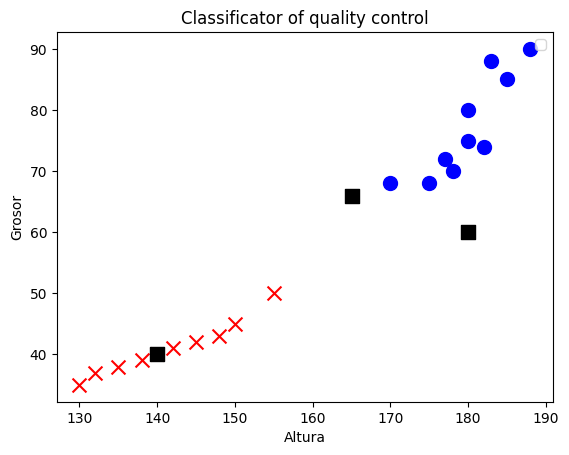

Clases de puntos y(n) [1, 1, 0]


In [13]:
x1 = np.array([[180.0], [75.0]])
x2 = np.array([[178.0], [70.0]])
x3 = np.array([[175.0], [68.0]])
x4 = np.array([[185.0], [85.0]])
x5 = np.array([[180.0], [80.0]])
x6 = np.array([[177.0], [72.0]])
x7 = np.array([[183.0], [88.0]])
x8 = np.array([[170.0], [68.0]])
x9 = np.array([[182.0], [74.0]])
x10 = np.array([[188.0], [90.0]])
x11 = np.array([[140.0], [40.0]])
x12 = np.array([[145.0], [42.0]])
x13 = np.array([[130.0], [35.0]])
x14 = np.array([[150.0], [45.0]])
x15 = np.array([[135.0], [38.0]])
x16 = np.array([[142.0], [41.0]])
x17 = np.array([[155.0], [50.0]])
x18 = np.array([[132.0], [37.0]])
x19 = np.array([[148.0], [43.0]])
x20 = np.array([[138.0], [39.0]])
# -----------------------------------------------------------

c0 = np.ones(10)  # Niños
c1 = np.zeros(10)  # Adultos

X = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20), axis=1)
C = np.concatenate((c0, c1), axis=0)
C = np.uint8(C)

# Nuevos datos
y1 = np.array([[165.0], [66.0]])
y2 = np.array([[180.0], [60.0]])
y3 = np.array([[140.0], [40.0]])
Y = np.concatenate((y1, y2, y3), axis=1)

# Visualización de los datos
for i in range(X.shape[1]):
    if C[i] == 0:
        marcar = 'x'
        color = 'red'
    else:
        marcar = 'o'
        color = 'blue'
    plt.scatter(x=X[0, i], y=X[1, i], c=color, s=100, marker=marcar)

for j in range(Y.shape[1]):
    plt.scatter(x=Y[0, j], y=Y[1, j], c='black', s=100, marker='s')

plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Classificator of Kid and Adutl')
plt.legend()
plt.show()

# Iniciar KNN
clasificador = KNN(k=5)
clasificador.aprendizaje(X, C)
clasificar = clasificador.clasificador(Y)
print('Clases de puntos y(n)', clasificar)


#### So, there are 2 adults and 1 kid

### PSEUDOCODE 

1. Import necessary libraries: numpy, matplotlib.pyplot, collections.Counter

2. Define the function to calculate the Euclidean distance between two points:
   - Function EUCLIDIAN(x, y):
     - Return sqrt(sum((x - y) ** 2))

3. Define the KNN class:
   - Initialize the class with k as a parameter (default k=4)
   - Method learning(self, X, C):
     - Save X as the feature vectors and C as the classes
   - Method classifier(self, Y):
     - Initialize an empty list called "classes"
     - For each column in Y:
       - Calculate distances to each sample in X using the EUCLIDIAN function
       - Find the k nearest distances
       - Identify the k classes corresponding to the nearest distances
       - Conduct a vote to determine the most common class among the k classes
       - Store the most common class in the "classes" list
     - Return the "classes" list with the predicted classes

4. Define the Height and Weight data:
   - Define several data sets x1, x2, ..., x20 with height and weight values

5. Define the corresponding classes for height and weight data:
   - Assign classes "Child" (c0) and "Adult" (c1)

6. Concatenate the data and classes:
   - Concatenate the data sets x1, x2, ..., x20
   - Concatenate the corresponding classes

7. Define new Height and Weight data for prediction:
   - Define new data sets y1, y2, y3

8. Visualize the data:
   - For each sample in X:
     - If the class is 0 (children), mark with "x" and color red
     - If the class is 1 (adults), mark with "o" and color blue
   - For each sample in Y:
     - Mark with "s" and color black

9. Display the plot with the visualized data.

10. Initialize the KNN classifier with k=5
11. Train the KNN classifier with the data and classes
12. Classify the new data using the KNN classifier
13. Print the predicted classes for the new data.

